In [1]:
import pandas as pd

airplan01 = pd.read_csv('airplan01.csv', sep=',', low_memory=False)
airplan02 = pd.read_csv('airplan02.csv', sep = ',', low_memory=False)

airplan = pd.merge(airplan01, airplan02, how = 'outer')

airplan['Gender'] = airplan['Gender'].map({'Female':0, 'Male':1})
airplan['Type of Travel'] = airplan['Type of Travel'].map({'Business travel':0, 'Personal Travel':1})
airplan['Class'] = airplan['Class'].map({'Eco':0, 'Eco Plus':1, 'Business':2})
airplan['Customer Type'] = airplan['Customer Type'].map({'disloyal Customer':0, 'Loyal Customer':1})

In [2]:
airplan = airplan.drop(['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','id','Unnamed: 0','Ease of Online booking','Gate location','Checkin service','Departure/Arrival time convenient'], axis=1)

In [3]:
airX = airplan[['Gender','Customer Type','Age','Type of Travel', 'Class', 'Inflight wifi service','Seat comfort','Inflight entertainment','On-board service','Baggage handling','Inflight service','Cleanliness']]
airY = airplan['satisfaction']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(airX, airY, test_size=0.2, random_state=1, stratify=airY)

Acurácia: 0.94


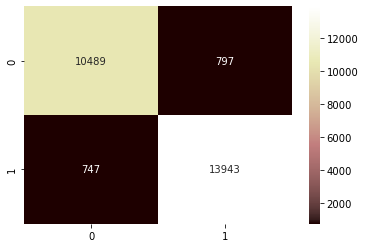

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

pred = decisionTree.predict(X_test)

# Matriz de confusão
cf_matrix = confusion_matrix(y_test, pred, labels = ["satisfied","neutral or dissatisfied"])
sns.heatmap(cf_matrix, annot=True,fmt='0', cmap='pink')

# Acurácia
acuracia= accuracy_score(y_test, pred)
print("Acurácia: {:.2f}".format(acuracia))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(airX, airY, test_size=0.2, shuffle=True, stratify=airY)

In [ ]:
from sklearn.neural_network import MLPClassifier
Rede_neural = MLPClassifier(learning_rate= 'constant', power_t=0.4, shuffle=True)
Rede_neural.fit(X_train, y_train)

In [ ]:
pred = Rede_neural.predict(X_test)

# Matriz de confusão
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True,fmt='0', cmap='pink')

# Acurácia
acuracia= accuracy_score(y_test, pred)
print("Acurácia: {:.2f}".format(acuracia))